# Final Total Emissions Columns

## Partial emissions columns are too many.
## Easier to work with "total partials"

**Totals Partials:**
- Farm_gate_Emissions_(CO2eq)_(AR5)_kt --> This includes crops, livestock, energy emissions, etc
- Land_Use_change_Emissions_(CO2eq)_(AR5)_kt --> This includes deforestation, fires, etc
- Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt --> This includes transport, retail, manufacturing, waste, etc

**Full Total:**
- Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_parquet(r'../data/FAOSTAT/clean_data/all_tables_processed/full_country_dataset_v2_imputed.parquet')

In [3]:
partial_columns = [
    'Farm_gate_Emissions_(CO2eq)_(AR5)_kt',
    'Land_Use_change_Emissions_(CO2eq)_(AR5)_kt',
    'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt',
]

sum_column = ['Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt']

totals_columns = partial_columns + sum_column

world_2020 = data[(data['Year'] == 2020) & (data['Area Code'] == 5000)]

for col in totals_columns:
    print(col)
    print(world_2020[col].sum()/1e6)
    print()

Farm_gate_Emissions_(CO2eq)_(AR5)_kt
7.755712251199999

Land_Use_change_Emissions_(CO2eq)_(AR5)_kt
3.1511530507

Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt
5.1293983792

Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt
16.0362636811



# World Partials

In [17]:
world = data[data['Area Code'] == 5000]
world_totals = world[partial_columns+['Area', 'Year']]

<Axes: title={'center': 'World Total Emissions'}>

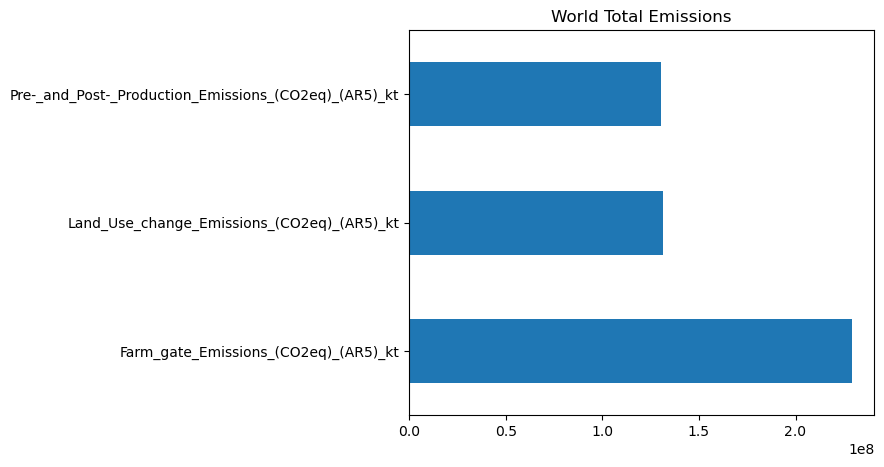

In [18]:
world_totals[partial_columns].sum().plot(kind='barh', figsize=(6, 5), title="World Total Emissions")

<Axes: title={'center': 'World Total Emissions as Percentage'}>

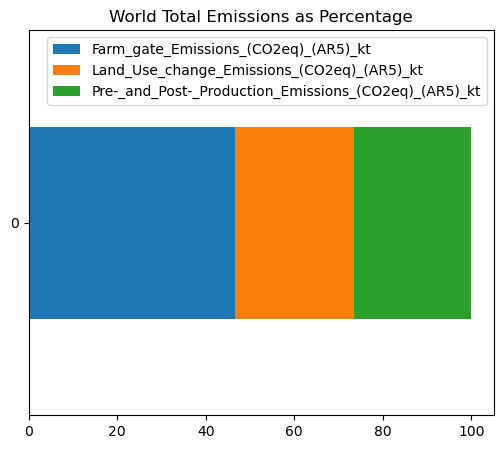

In [19]:
# Calculate the percentage contributions
percentages = world_totals[partial_columns].sum().divide(world_totals[partial_columns].sum().sum()).mul(100)

# Convert to a DataFrame with a single row
df_percentages = pd.DataFrame(percentages).T

# Plot as a single horizontal stacked bar
df_percentages.plot(
    kind='barh', 
    stacked=True, 
    figsize=(6, 5), 
    title="World Total Emissions as Percentage",
    legend=True  # Show legend to differentiate segments
)


# SAVE TOTALS DATAFRAME

In [21]:
data.to_parquet(r'../data/FAOSTAT/clean_data/all_tables_processed/full_country_dataset_v4_TOTALS.parquet', index = False)